In [1]:
#import required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
df = pd.read_csv(r"C:\AI and ML Intern\Task 3\Housing.csv")

In [3]:
#preview the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
#convert categorical variables into dummy/indicator variablesabs
df = pd.get_dummies(df,drop_first=True)

In [13]:
#features and target
X = df.drop('price',axis=1)
Y = df["price"]

In [17]:
X.shape

(545, 13)

In [18]:
Y.shape

(545,)

In [22]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [20]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [24]:
#splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((436, 13), (109, 13), (436,), (109,))

In [26]:
#training the model 
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
#predictions
Y_pred = lr.predict(X_test)

In [29]:
print(Y_pred)

[5164653.90033967 7224722.29802167 3109863.24240338 4612075.3272256
 3294646.25725955 3532275.09556558 5611774.56836476 6368145.98732718
 2722856.95689985 2629405.61585782 9617039.5031558  2798087.30447888
 3171096.76847063 3394639.09125528 3681088.65424275 5263187.74621485
 3035963.47612384 4786122.8004005  4349551.9200572  3572362.09930451
 5774875.21395649 5886993.57919883 2730836.19518458 4727316.47323635
 5244847.527168   7555324.21605603 3220790.84680268 5191898.79934207
 8143726.91009785 3398814.09825035 6490693.05027925 3315105.9074781
 6708457.36761326 4201738.21071676 3557571.06735186 5836974.50478626
 4808660.67448475 4362878.73613261 3191242.95701508 4596554.93225238
 4566042.86048411 3517779.52374148 7205844.79365835 3983597.27861103
 3749338.70271056 4274731.09125895 6757442.10783741 4037320.43665851
 3769334.90397126 3417627.44377156 7268416.67644611 2802534.35431384
 4341750.61420452 4516422.15345642 3679997.65037847 2678959.06481152
 7498029.17782458 2920366.45493167 4

In [30]:
#evaluation
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

In [31]:
print("\nModel Evaluation:")
print(f"mae:{mae:.2f}")
print(f"mse:{mse:.2f}")
print(f"R2 Score:{r2:.4f}")


Model Evaluation:
mae:970043.40
mse:1754318687330.66
R2 Score:0.6529


In [32]:
#coefficients
coef = pd.DataFrame(lr.coef_,X.columns, columns=["coefficient"])
print("\nModel coefficients:\n",coef)


Model coefficients:
                                   coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


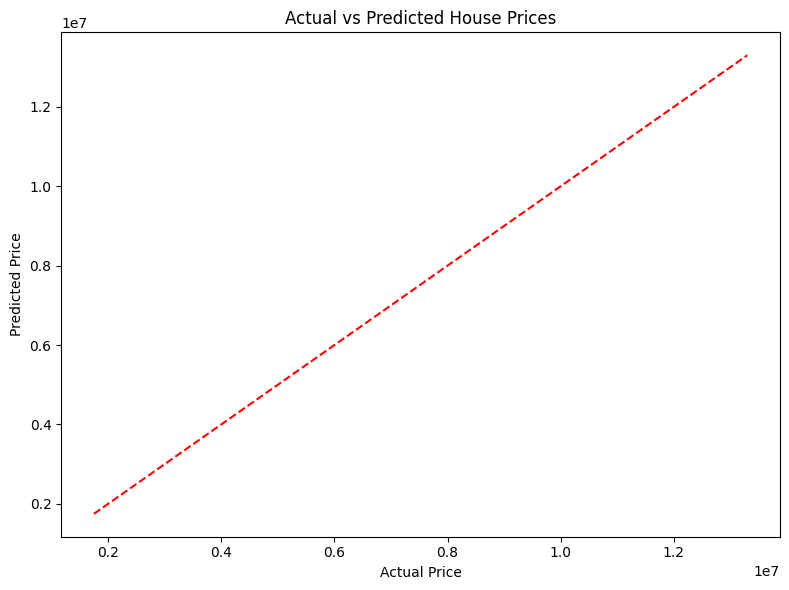

In [33]:
#plotting actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(X=Y_test,Y =Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--') #Diagonal line
plt.tight_layout()
plt.show()

# The Model Is not doing Great SO we are implementing Feature scaling

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [36]:
model = LinearRegression()
model.fit(X_train_Scaled,Y_train)

LinearRegression()

In [37]:
Y_pred = model.predict(X_test_Scaled)

In [38]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Model Evaluation:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R2 Score:", round(r2, 4))

Model Evaluation:
MAE: 970043.4
MSE: 1754318687330.67
R2 Score: 0.6529


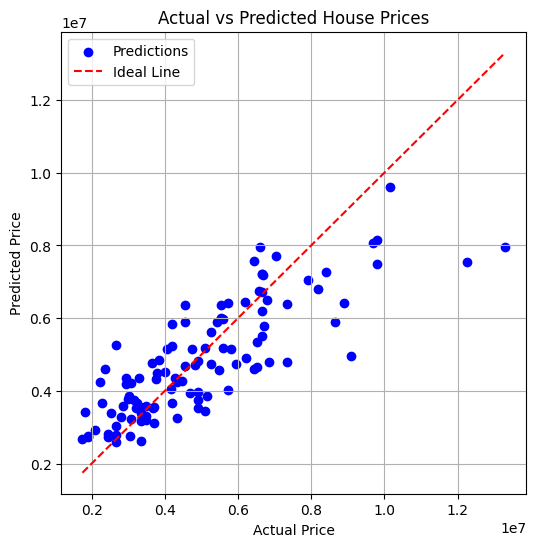

In [39]:
# 9. Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, color='blue', label="Predictions")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label="Ideal Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()